# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# Always Validate Your Output Variable Before Using Linear Regression

Post Link: [Substack](https://avichawla.substack.com/p/always-validate-your-output-variable)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:activity:7043533853507862528/)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

plt.style.use(["seaborn-darkgrid"])
c_list = ['#46C7C7', '#00B9FF', '#FF7051']

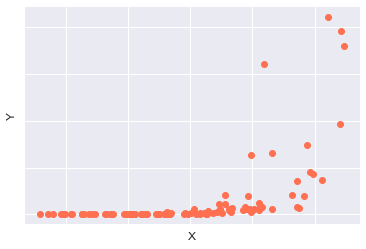

In [4]:
np.random.seed(123)

# Generate random X values
X = np.random.uniform(low=-5, high=5, size=(100, 1))

# Generate dependent variable Y with a skewed distribution
Y = 10 + X + np.random.normal(loc=0, scale=1, size=(100, 1))
Y = np.exp(Y)

# Plot the data
fig, ax = plt.subplots()
plt.scatter(X, Y, c = c_list[2])
plt.xlabel('X')
plt.ylabel('Y')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

<IPython.core.display.Javascript object>

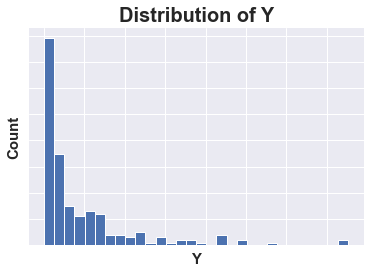

In [6]:
# Create gamma dataset
np.random.seed(7)
x1 = np.random.uniform(-1, 1, 200)
x2 = np.random.uniform(-1, 1, 200)
mu = np.exp(1 + 0.5*x1 + 2*x2 + np.random.randn())
y = np.random.gamma(shape = 2, scale = mu/2, size = 200)
gamma_data = pd.DataFrame({'X1':x1, 'X2':x2, 'Y':y})
# Plot data

fig, ax = plt.subplots()

plt.hist(gamma_data['Y'], bins=30)
plt.ylabel('Count', fontsize=15, fontweight="bold")
plt.xlabel('Y', fontsize=15, fontweight="bold")
plt.title('Distribution of Y', fontsize = 20, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

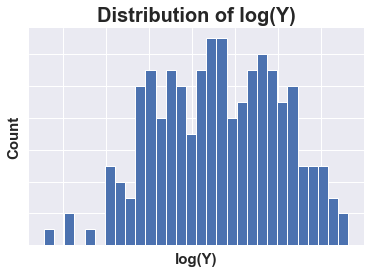

In [7]:
# Plot data
fig, ax = plt.subplots()
plt.hist(np.log(gamma_data['Y']), bins=30)
plt.ylabel('Count', fontsize=15, fontweight="bold")
plt.xlabel('log(Y)', fontsize=15, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title('Distribution of log(Y)', fontsize = 20, fontweight="bold")

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model without addressing the skewness
model1 = LinearRegression().fit(X, Y)

# Train a linear regression model with a log transformation to address the skewness
model2 = LinearRegression().fit(X, np.log(Y))


In [9]:
# Generate X values for plotting
X_plot = np.linspace(-5, 5, 100).reshape(-1, 1)

# Get the predictions from each model
Y_pred1 = model1.predict(X_plot)
Y_pred2 = model2.predict(X_plot)

2023-03-20 16:54:30,505 [24224] WARNING  matplotlib.legend:1217: [JupyterRequire] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


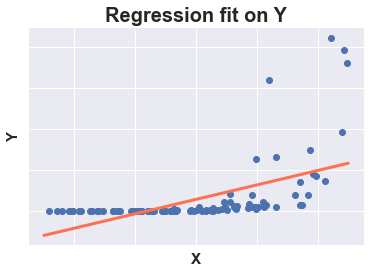

In [10]:
# Plot the data and predictions from each model
fig, ax = plt.subplots()
plt.scatter(X, Y)
plt.plot(X_plot, Y_pred1, c = c_list[2], linewidth = 3)
plt.xlabel('X', fontsize=15, fontweight="bold")
plt.ylabel('Y', fontsize=15, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.legend(fontsize = 15)
plt.title('Regression fit on Y', fontsize = 20, fontweight="bold")

plt.show()

2023-03-20 16:54:36,663 [24224] WARNING  matplotlib.legend:1217: [JupyterRequire] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


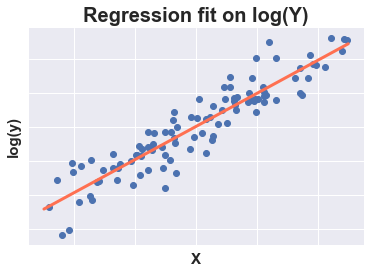

In [11]:
# Plot the data and predictions from each model
fig, ax = plt.subplots()
plt.scatter(X, np.log(Y))
plt.plot(X_plot, Y_pred2, c = c_list[2], linewidth = 3)
plt.xlabel('X', fontsize=15, fontweight="bold")
plt.ylabel('log(y)', fontsize=15, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.legend(fontsize = 15)
plt.title('Regression fit on log(Y)', fontsize = 20, fontweight="bold")

plt.show()